## 2D Isotropic Quantum Harmonic Oscillator - Dynamic Simulation
### Case 2.1 - Finite Superposition of Cartesian Eigenstates

<br>
Dynamic simulation of the wave function given by the initial superposition

$$ \Psi(\mathbf{r},0) = A \left( \frac{1}{3} \psi_{0,1} - \frac{2 \mathrm{i}}{5} \psi_{3,1} + \frac{1}{2} \psi_{1,2} \right) $$

from time $t = 0$ to time  $t = T = 2 \pi / \omega$ .

This notebook contains graphs of:
* the cartesian eigenstates $\psi_{1,2}$ and $\psi_{3,2}$ ,
* the initial probability density function $|\Psi(\mathbf{r},0)|^2$ ,
* the phase of the initial wave function $\arg \Psi(\mathbf{r},0)$ ,
* the initial probability current field $\mathbf{J}(\mathbf{r})$ .


#### Import libraries and functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import qho_eigen as qho
from math_tools import *


#### Cartesian eigenstates $\psi_{1,2}$ and $\psi_{3,2}$


In [2]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
x_min = -4
x_max = 4
dx = 0.01
x = np.linspace(x_min, x_max, int((x_max - x_min) / dx) + 1) # np.linspace handles edges better

y_min = -4
y_max = 4
dy = 0.01
y = np.linspace(y_min, y_max, int((y_max - y_min) / dy) + 1) # np.linspace handles edges better

X, Y = np.meshgrid(x, y)

# Compute eigenstates
N = 2
nx = np.vstack(np.array([1, 3]), dtype=object)
ny = np.vstack(np.array([2, 2]), dtype=object)
eigenfuns = np.zeros((N, np.size(y), np.size(x)))

for i in range(N):
    eigenfuns[i] = qho.eigen2D_cart(s, nx[i][0], ny[i][0], X, Y)


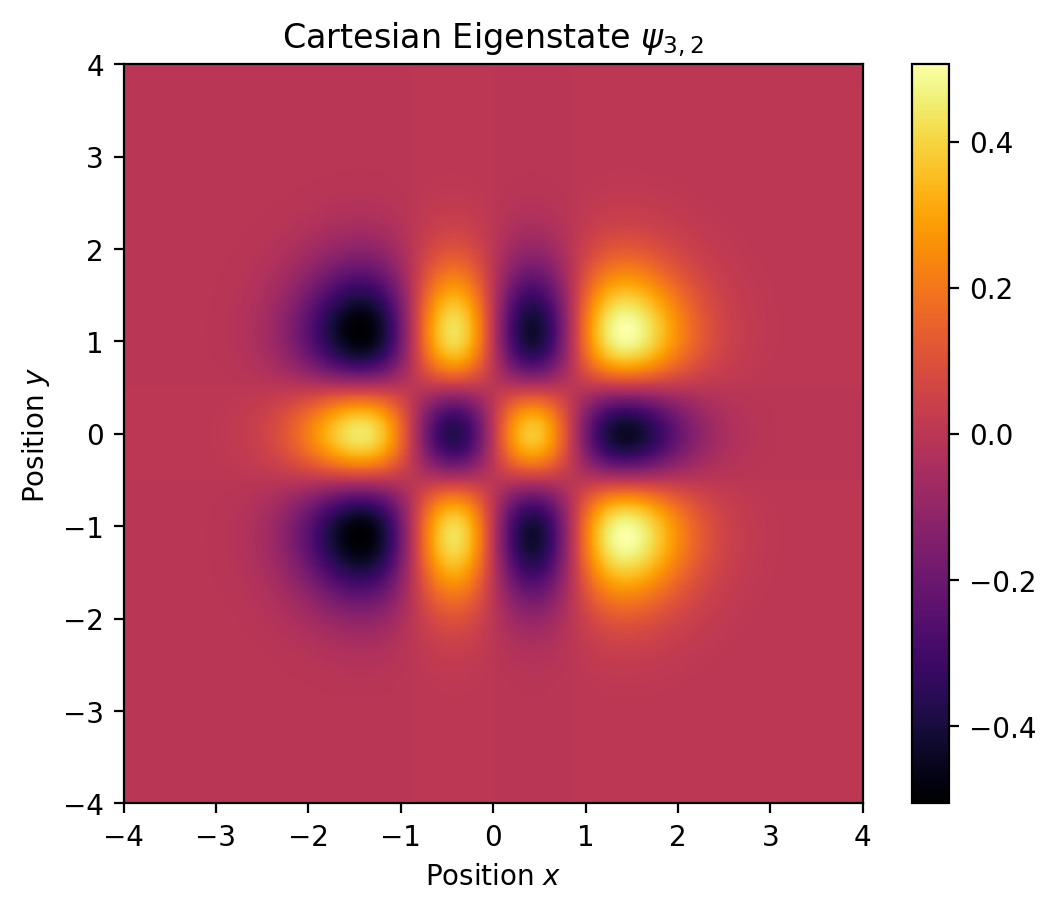

In [3]:
# Plot cartesian eigenstates
i = 1

fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(x, y, eigenfuns[i], cmap='inferno')
ax.set_title(rf'Cartesian Eigenstate $\psi_{{{nx[i][0]},{ny[i][0]}}}$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(x_min, x_max), ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Initialize state $\Psi(\mathbf{r},0)$


In [4]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
x_min = -3
x_max = 3
dx = 0.01
x = np.linspace(x_min, x_max, int((x_max - x_min) / dx) + 1) # np.linspace handles edges better

y_min = -3
y_max = 3
dy = 0.01
y = np.linspace(y_min, y_max, int((y_max - y_min) / dy) + 1) # np.linspace handles edges better

X, Y = np.meshgrid(x, y)

# Compute eigenstates
N = 3
nx = np.vstack(np.array([0, 3, 1]), dtype=object)
ny = np.vstack(np.array([1, 1, 2]), dtype=object)
eigenfuns = np.zeros((N, np.size(y), np.size(x)))

for i in range(N):
    eigenfuns[i] = qho.eigen2D_cart(s, nx[i][0], ny[i][0], X, Y)

# Initialize wave function
A = 30 / math.sqrt(469)
psi0 = A * (1/3*eigenfuns[0] - 2j/5*eigenfuns[1] + 1/2*eigenfuns[2])

# Compute eigenstate coefficients
c = A * np.vstack(np.array([1/3, -2j/5, 1/2]))

# Verify normalization of probability density function
print(f'Integral of |Ψ(r,0)|² = {np.trapz(np.trapz(abs2(psi0), x=x, axis=1), x=y)}')
print()


Integral of |Ψ(r,0)|² = 0.9999945478264645



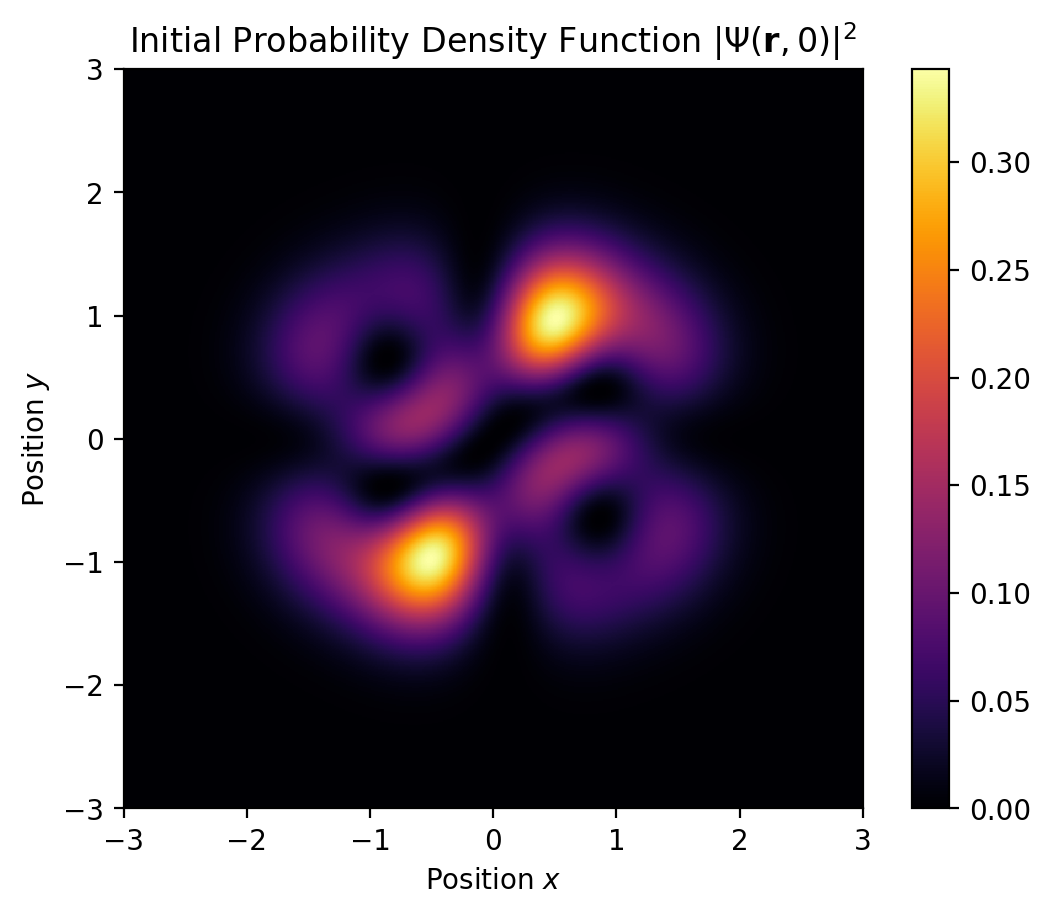

In [5]:
# Plot initial probability density function
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(x, y, abs2(psi0), cmap='inferno', vmin=0)
ax.set_title(r'Initial Probability Density Function $|\Psi(\mathbf{r},0)|^2$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(x_min, x_max), ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Phase of initial wave function $\arg \Psi(\mathbf{r},0)$


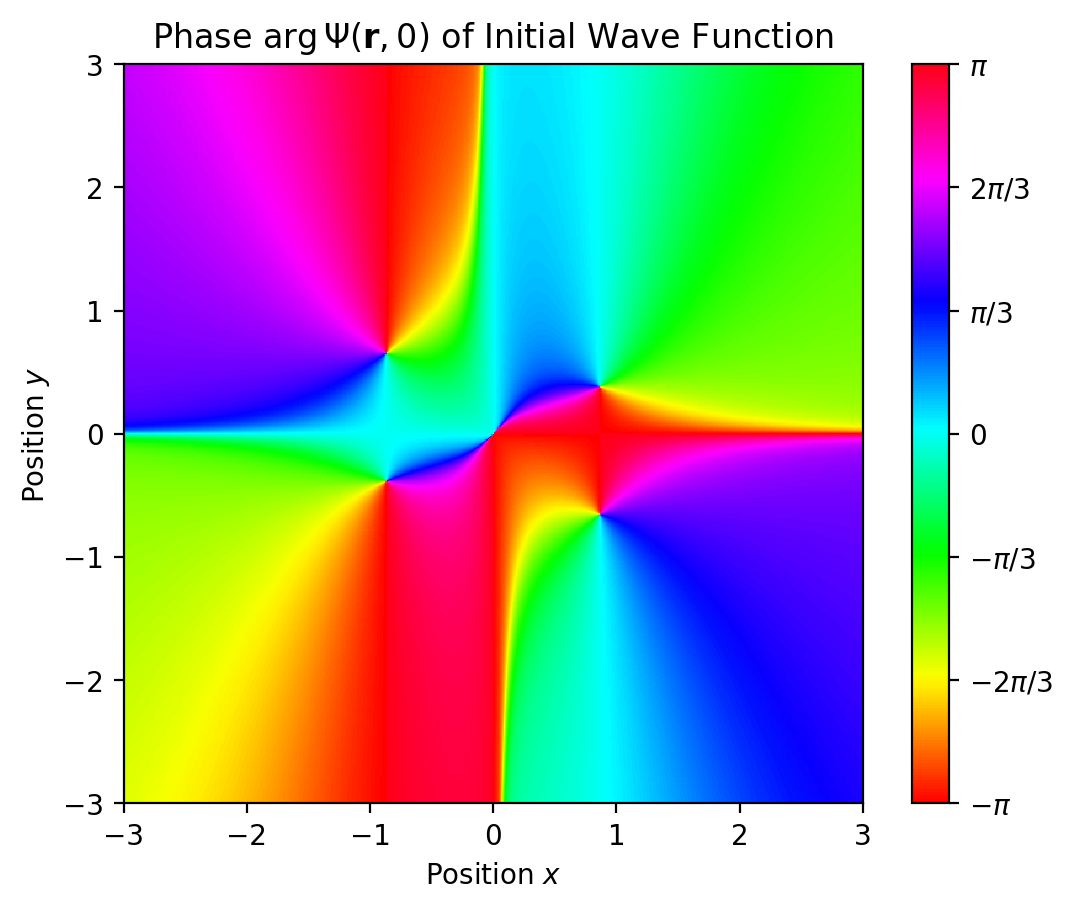

In [6]:
# Plot phase of initial wave function
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(x, y, np.angle(psi0), cmap='hsv', vmin=-math.pi, vmax=math.pi)
ax.set_title(r'Phase $\arg \Psi(\mathbf{r},0)$ of Initial Wave Function')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(x_min, x_max), ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

cbar = fig.colorbar(pcmesh, ax=ax, ticks=np.linspace(-math.pi, math.pi, 7))
cbar.set_ticklabels([r'$-\pi$', r'$-2\pi/3$', r'$-\pi/3$', r'$0$', r'$\pi/3$', r'$2\pi/3$', r'$\pi$'])

plt.show()


#### Initial probability current field $\mathbf{J}(\mathbf{r})$


In [12]:
# Compute probability current field of initial wave function
grad_y, grad_x = np.gradient(psi0, y, x)
Jx = hbar / M * (psi0.conjugate() * grad_x).imag
Jy = hbar / M * (psi0.conjugate() * grad_y).imag


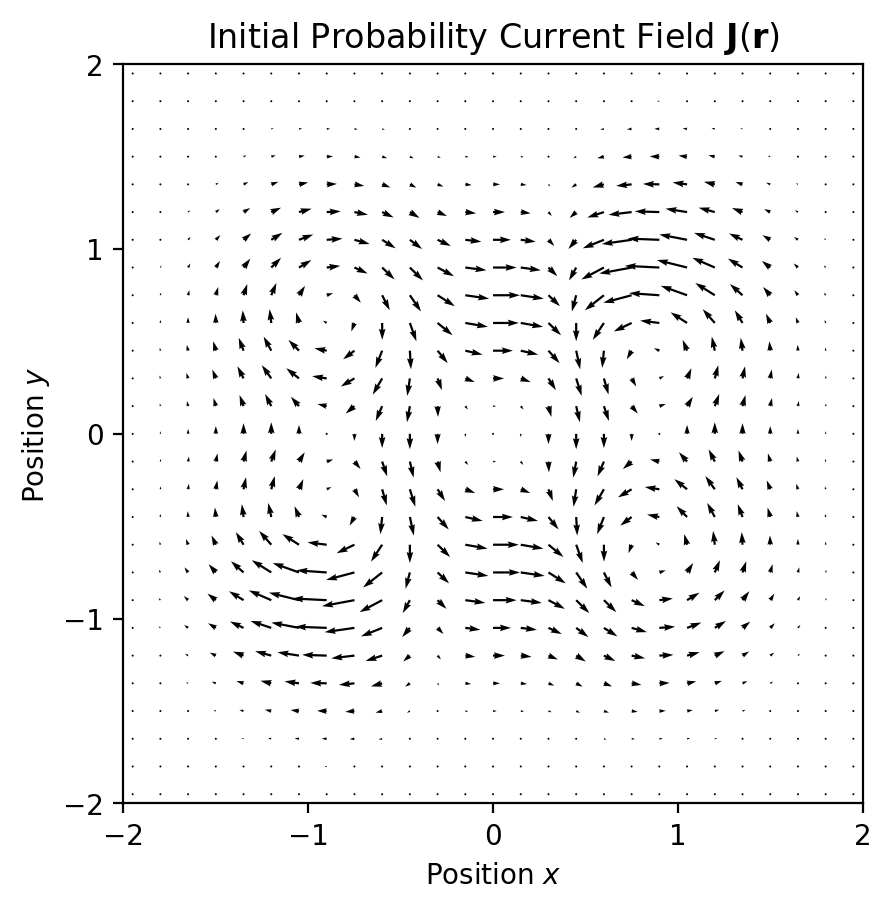

In [8]:
# Plot probability current field of initial wave function
step = 15

fig, ax = plt.subplots()
ax.quiver(X[::step,::step], Y[::step,::step], Jx[::step,::step], Jy[::step,::step], scale=4, width=0.003)
ax.set_title(r'Initial Probability Current Field $\mathbf{J}(\mathbf{r})$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(-2, 2), ax.set_ylim(-2, 2)
ax.set_xticks(np.arange(-2, 3, 1)), ax.set_yticks(np.arange(-2, 3, 1))
ax.set_aspect('equal', adjustable='box')

plt.show()


#### Time evolution of probability density function $|\Psi(\mathbf{r},t)|^2$


In [9]:
%%timeit
# Initialize time array
T = 2 * math.pi / w
t = np.linspace(0, T, 501)
dt = t[1] - t[0]

# Compute time evolution of wave function
psi = np.zeros((np.size(t), np.size(y), np.size(x)), dtype=np.complex128)
psi[0] = psi0

q = (nx + ny).astype(np.float64) # Update dtype outside of for loop to speed up
c_t = c * np.exp(-1j * (1 + q) * w * t)


for i in range(np.size(t) - 1):
    # c_t = c * np.exp(-1j * (1 + q) * w * t[i+1])
    psi[i+1] = np.sum(c_t[:,i+1,np.newaxis,np.newaxis] * eigenfuns, axis=0)


8.79 s ± 1.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
c_t[:, np.newaxis]


NameError: name 'c_t' is not defined

In [ ]:
%%timeit
T = 2 * math.pi / w
t = np.linspace(0, T, 501)
dt = t[1] - t[0]

# Compute time evolution of wave function
psi = np.zeros((np.size(t), np.size(y), np.size(x)), dtype=np.complex128)
psi[0] = psi0

c_t = c * np.exp(-1j * (1 + q) * w * t)

# print(np.shape(     np.reshape(np.transpose(c_t), (501,3,1,1))     ))

c_t = np.reshape(np.transpose(c_t), (501,3,1,1))

# q = (nx + ny).astype(np.float64) # Update dtype outside of for loop to speed up

for i in range(np.size(t) - 1):
    psi[i+1] = np.sum(c_t[i+1] * eigenfuns, axis=0)


In [ ]:
c_t = c * np.exp(-1j * (1 + q) * t)

print(np.shape(c_t))


In [ ]:
t = np.arange(4)
c_t = c * np.exp(-1j * (1 + q) * t)

# print(np.reshape(c))

print()
print(t)
print(c)



In [ ]:
A = q + t

print(A)
print()

print(((np.transpose(A))[:,:,np.newaxis,np.newaxis])[2])
